In [2]:
import numpy as np
import pandas as pd
df = pd.read_csv("D:\Excelr_assignments\Timeseries\Timeseries\exchange_rate.csv")
df.head()

<>:3: SyntaxWarning: invalid escape sequence '\E'
<>:3: SyntaxWarning: invalid escape sequence '\E'
C:\Users\dell\AppData\Local\Temp\ipykernel_13476\743172222.py:3: SyntaxWarning: invalid escape sequence '\E'
  df = pd.read_csv("D:\Excelr_assignments\Timeseries\Timeseries\exchange_rate.csv")


,date,Ex_rate
0,01-01-1990 00:00,0.7855
1,02-01-1990 00:00,0.7818
2,03-01-1990 00:00,0.7867
3,04-01-1990 00:00,0.7860
4,05-01-1990 00:00,0.7849


In [3]:
df.shape

(7588, 2)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7588 entries, 0 to 7587
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   date     7588 non-null   object 
 1   Ex_rate  7588 non-null   float64
dtypes: float64(1), object(1)
memory usage: 118.7+ KB


In [5]:
# giving the columns names as for the convenience :

df.columns = ['Date', 'USD_to_AUD']

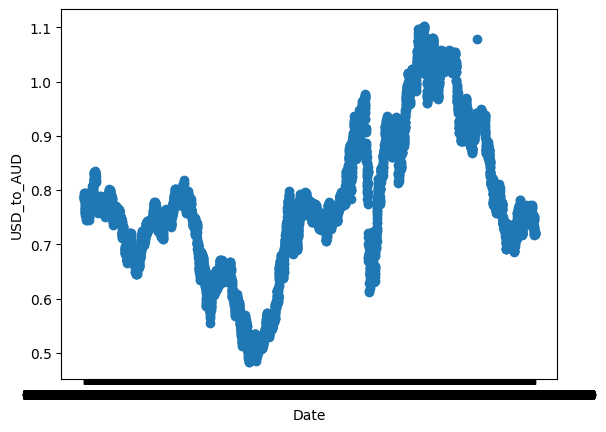

In [6]:
# firsting with the scatterplot and for the visualization :

import matplotlib.pyplot as plt
import seaborn as sns

plt.scatter(x = df["Date"],y = df["USD_to_AUD"])
plt.xlabel("Date")
plt.ylabel("USD_to_AUD")
plt.show()

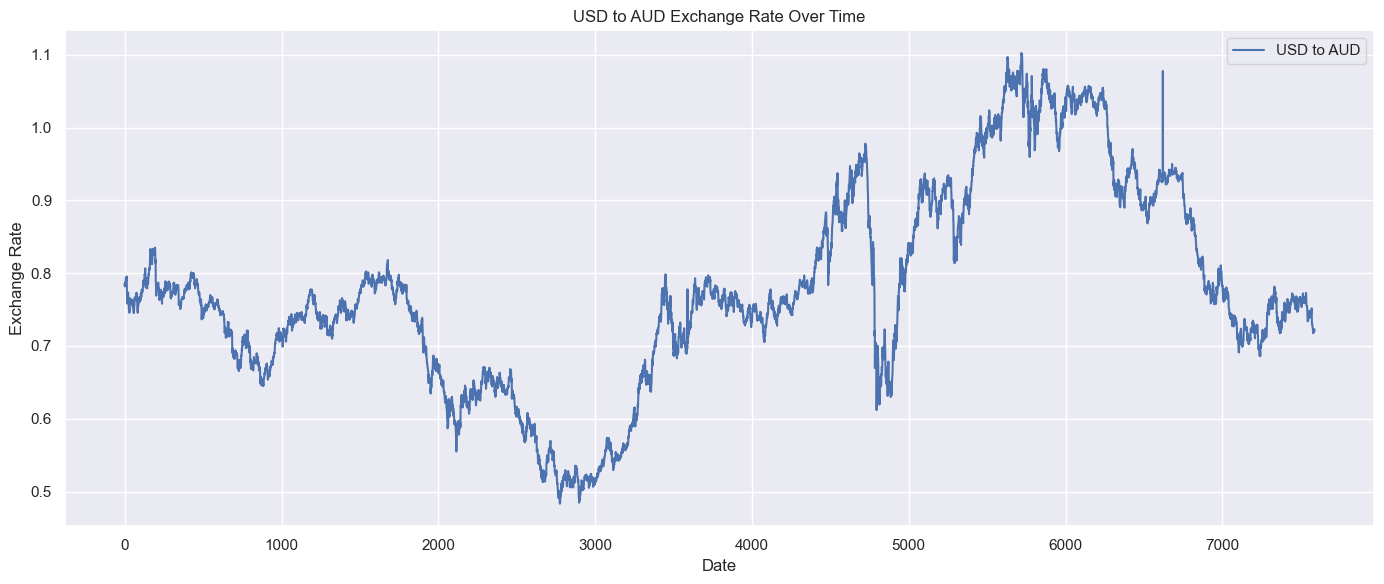

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style
sns.set(style="darkgrid")

# Plot the time series
plt.figure(figsize=(14, 6))
plt.plot(df.index, df['USD_to_AUD'], label='USD to AUD')
plt.title("USD to AUD Exchange Rate Over Time")
plt.xlabel("Date")
plt.ylabel("Exchange Rate")
plt.legend()
plt.tight_layout()
plt.show()


In [8]:
df.isnull().sum()

# their are no null values in the given data set :


Date          0
USD_to_AUD    0
dtype: int64

<Axes: ylabel='USD_to_AUD'>

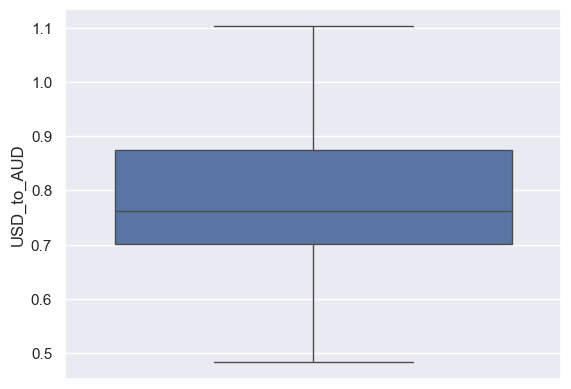

In [9]:
# checking for the outlayersin the data set:

sns.boxplot(df["USD_to_AUD"])

# there are no outlayers in the data set:

In [10]:
# science the data is in the object datatype that is catogirical i have changed it into the date and time:

df['Date'] = pd.to_datetime(df['Date'],dayfirst=True)  
df.set_index('Date', inplace=True)       


In [11]:
df.head()

,USD_to_AUD
Date,
1990-01-01,0.7855
1990-01-02,0.7818
1990-01-03,0.7867
1990-01-04,0.7860
1990-01-05,0.7849


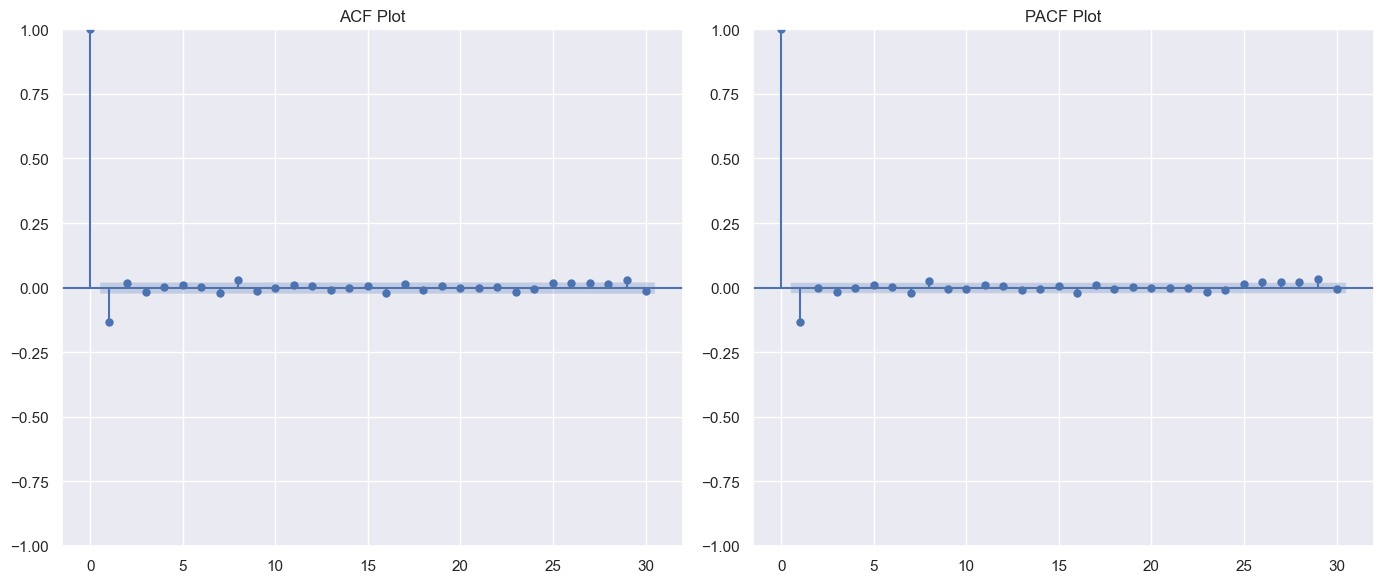

In [12]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# First, ensure stationarity with differencing (d=1 is common)
diff_series = df['USD_to_AUD'].diff().dropna()

# Plot ACF and PACF
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
plot_acf(diff_series, lags=30, ax=plt.gca())
plt.title("ACF Plot")

plt.subplot(1,2,2)
plot_pacf(diff_series, lags=30, ax=plt.gca(), method='ywm')
plt.title("PACF Plot")
plt.tight_layout()
plt.show()


In [13]:
# model fitting with the arima:

from statsmodels.tsa.arima.model import ARIMA

# Fit ARIMA model
model = ARIMA(df['USD_to_AUD'], order=(1,1,1))
results = model.fit()

# Print model summary
print(results.summary())


C:\Users\dell\anaconda3.1\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\dell\anaconda3.1\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\dell\anaconda3.1\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:             USD_to_AUD   No. Observations:                 7588
Model:                 ARIMA(1, 1, 1)   Log Likelihood               28054.161
Date:                Fri, 25 Jul 2025   AIC                         -56102.322
Time:                        16:57:49   BIC                         -56081.519
Sample:                    01-01-1990   HQIC                        -56095.182
                         - 10-10-2010                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1268      0.045     -2.797      0.005      -0.216      -0.038
ma.L1         -0.0046      0.045     -0.101      0.920      -0.094       0.085
sigma2      3.596e-05   9.94e-08    361.604      0.0

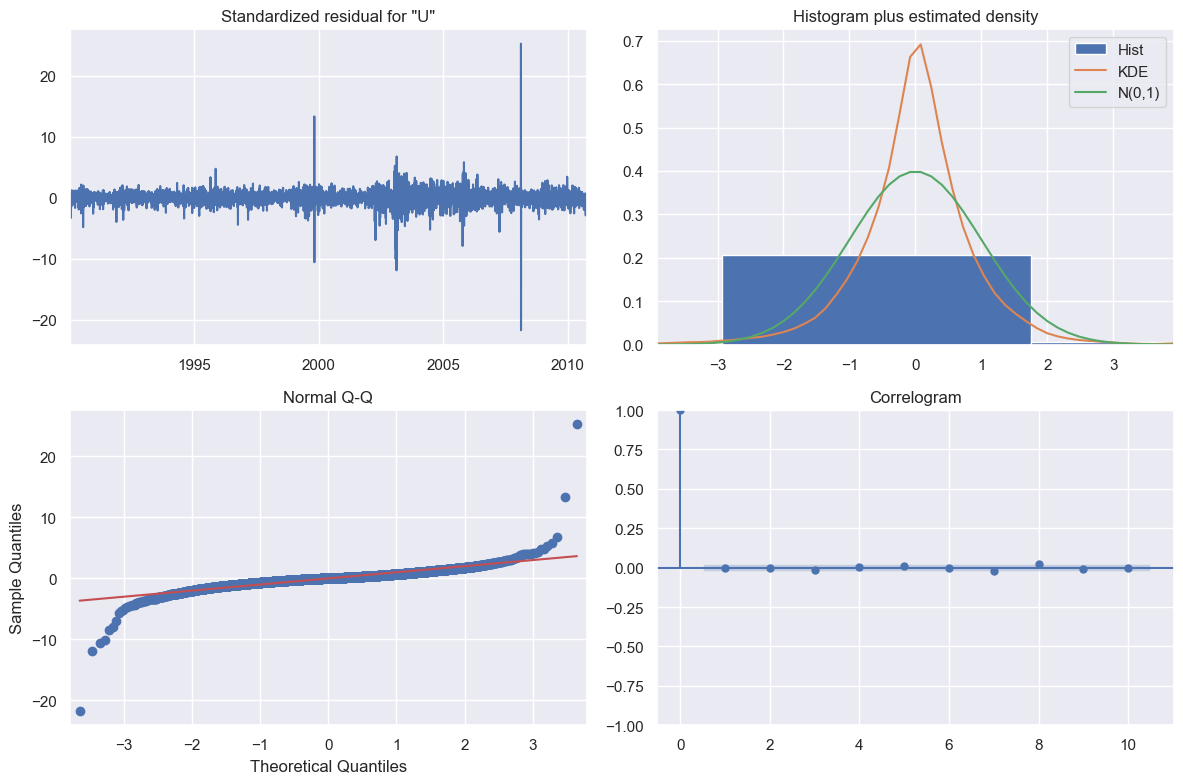

In [14]:
# Ploting the  residual diagnostics

results.plot_diagnostics(figsize=(12, 8))
plt.tight_layout()
plt.show()


In [16]:
from statsmodels.tsa.stattools import adfuller

# Perform ADF test on original series
adf_result_original = adfuller(df['USD_to_AUD'])
print("ADF Test on Original Series")
print(f"ADF Statistic: {adf_result_original[0]}")
print(f"p-value: {adf_result_original[1]}")
print("Critical Values:")
for key, value in adf_result_original[4].items():
    print(f"   {key}: {value}")
if adf_result_original[1] > 0.05:
    print("=> Series is likely non-stationary. Differencing might be needed.\n")
else:
    print("=> Series is likely stationary.\n")

# Perform ADF test on differenced series
adf_result_diff = adfuller(diff_series)
print("ADF Test on Differenced Series")
print(f"ADF Statistic: {adf_result_diff[0]}")
print(f"p-value: {adf_result_diff[1]}")
print("Critical Values:")
for key, value in adf_result_diff[4].items():
    print(f"   {key}: {value}")
if adf_result_diff[1] > 0.05:
    print("=> Differenced series is still likely non-stationary.\n")
else:
    print("=> Differenced series is likely stationary.\n")


ADF Test on Original Series
ADF Statistic: -1.6649941807381528
p-value: 0.4492327353597901
Critical Values:
   1%: -3.4312123140180137
   5%: -2.861921078147796
   10%: -2.5669728434336108
=> Series is likely non-stationary. Differencing might be needed.

ADF Test on Differenced Series
ADF Statistic: -99.39343120118629
p-value: 0.0
Critical Values:
   1%: -3.4312123140180137
   5%: -2.861921078147796
   10%: -2.5669728434336108
=> Differenced series is likely stationary.



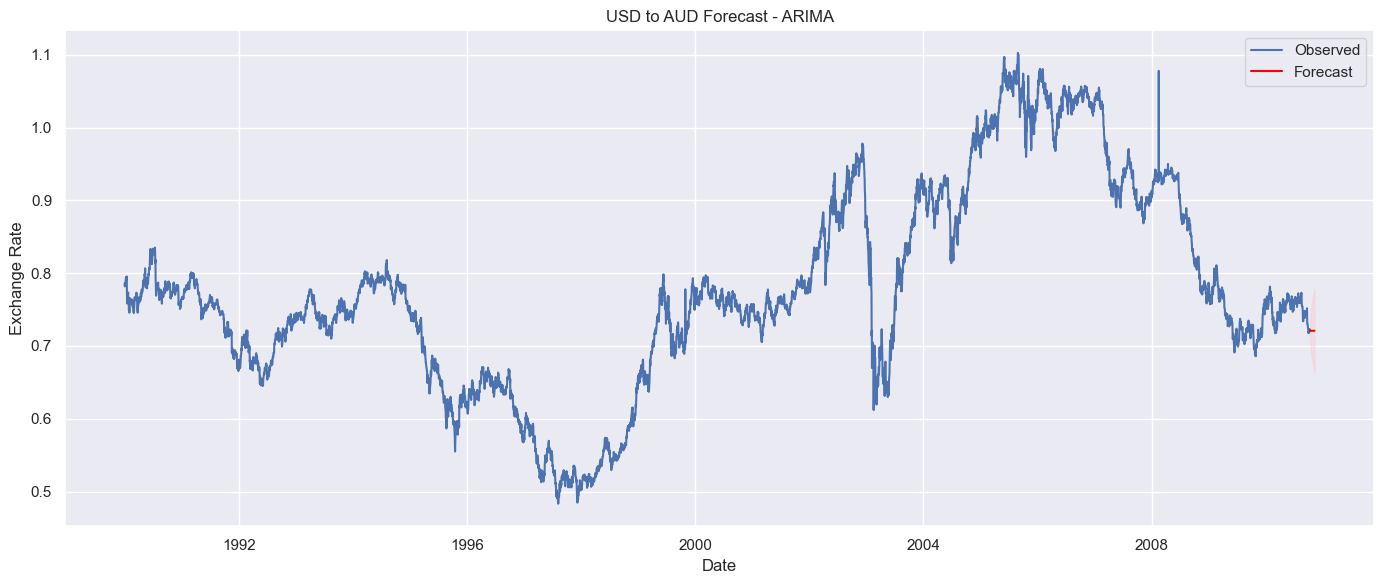

In [17]:
forecast_steps = 30
forecast = results.get_forecast(steps=forecast_steps)
forecast_mean = forecast.predicted_mean
conf_int = forecast.conf_int()

# Plot
plt.figure(figsize=(14,6))
plt.plot(df['USD_to_AUD'], label='Observed')
plt.plot(forecast_mean.index, forecast_mean, label='Forecast', color='red')
plt.fill_between(forecast_mean.index, 
                 conf_int.iloc[:, 0], 
                 conf_int.iloc[:, 1], 
                 color='pink', alpha=0.3)
plt.title("USD to AUD Forecast - ARIMA")
plt.xlabel("Date")
plt.ylabel("Exchange Rate")
plt.legend()
plt.tight_layout()
plt.show()


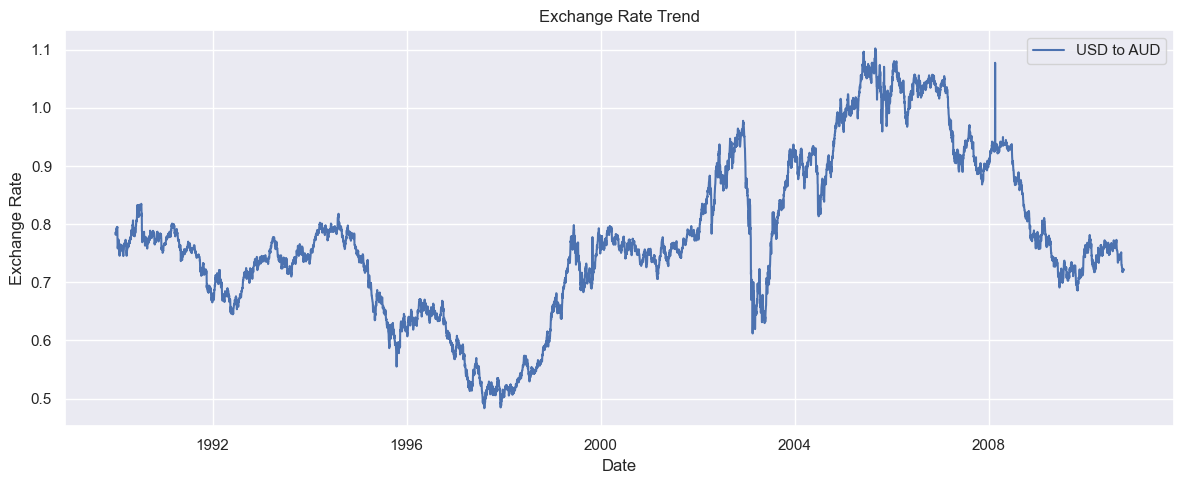

In [18]:
# Let’s check the trend visually to decide:

import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))
plt.plot(df['USD_to_AUD'], label='USD to AUD')
plt.title('Exchange Rate Trend')
plt.xlabel('Date')
plt.ylabel('Exchange Rate')
plt.legend()
plt.tight_layout()
plt.show()


C:\Users\dell\anaconda3.1\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


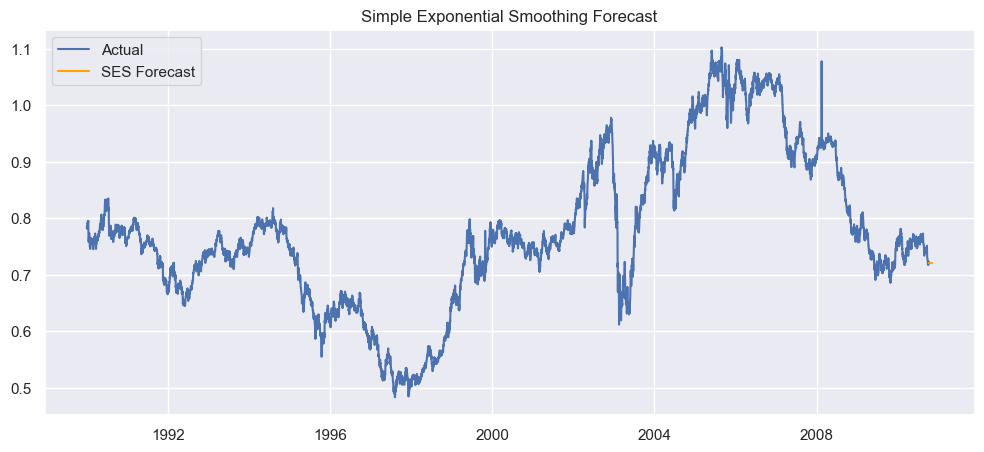

In [19]:
# Simple Exponential Smoothing :

from statsmodels.tsa.holtwinters import SimpleExpSmoothing

model_simple = SimpleExpSmoothing(df['USD_to_AUD'])
fit_simple = model_simple.fit()

forecast_simple = fit_simple.forecast(30)

plt.figure(figsize=(12, 5))
plt.plot(df['USD_to_AUD'], label='Actual')
plt.plot(forecast_simple, label='SES Forecast', color='orange')
plt.title('Simple Exponential Smoothing Forecast')
plt.legend()
plt.show()


C:\Users\dell\anaconda3.1\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


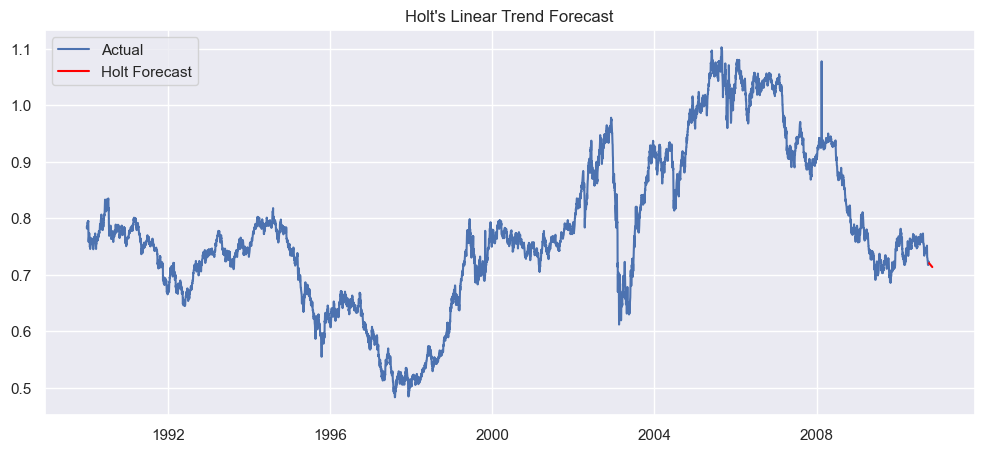

In [20]:
# Holt’s Linear Trend Method

from statsmodels.tsa.holtwinters import Holt

model_holt = Holt(df['USD_to_AUD'])
fit_holt = model_holt.fit()

forecast_holt = fit_holt.forecast(30)

plt.figure(figsize=(12, 5))
plt.plot(df['USD_to_AUD'], label='Actual')
plt.plot(forecast_holt, label='Holt Forecast', color='red')
plt.title("Holt's Linear Trend Forecast")
plt.legend()
plt.show()


C:\Users\dell\anaconda3.1\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


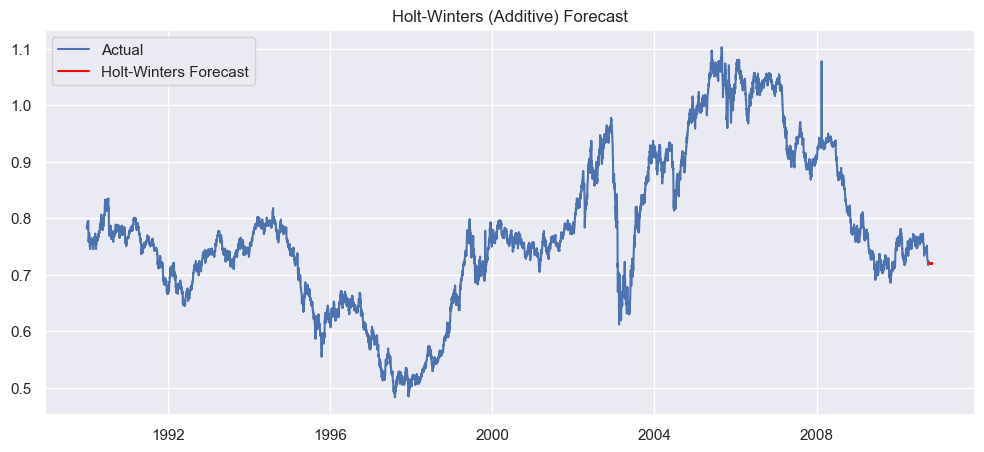

In [21]:
# Holt-Winters (trend + seasonality)

from statsmodels.tsa.holtwinters import ExponentialSmoothing

model_hw = ExponentialSmoothing(df['USD_to_AUD'],
                                 trend='add',
                                 seasonal='add',
                                 seasonal_periods=12)
fit_hw = model_hw.fit()

forecast_hw = fit_hw.forecast(30)

plt.figure(figsize=(12, 5))
plt.plot(df['USD_to_AUD'], label='Actual')
plt.plot(forecast_hw, label='Holt-Winters Forecast', color='red')
plt.title('Holt-Winters (Additive) Forecast')
plt.legend()
plt.show()


In [22]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Split dataset
train = df.iloc[:-30]
test = df.iloc[-30:]

# Refit models on train set only
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.holtwinters import Holt

# ARIMA (1,1,1) – use your chosen parameters
arima_model = ARIMA(train['USD_to_AUD'], order=(1, 1, 1)).fit()
arima_forecast = arima_model.forecast(steps=30)

# Holt’s Linear Exponential Smoothing
holt_model = Holt(train['USD_to_AUD']).fit()
holt_forecast = holt_model.forecast(30)


C:\Users\dell\anaconda3.1\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\dell\anaconda3.1\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\dell\anaconda3.1\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\dell\anaconda3.1\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


In [23]:
def mean_absolute_percentage_error(y_true, y_pred): 
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# ARIMA metrics
mae_arima = mean_absolute_error(test, arima_forecast)
rmse_arima = np.sqrt(mean_squared_error(test, arima_forecast))
mape_arima = mean_absolute_percentage_error(test, arima_forecast)

# Holt metrics
mae_holt = mean_absolute_error(test, holt_forecast)
rmse_holt = np.sqrt(mean_squared_error(test, holt_forecast))
mape_holt = mean_absolute_percentage_error(test, holt_forecast)


In [24]:
print("🔍 Evaluation Metrics for Forecasting (30 Days)\n")
print(f"ARIMA Model     : MAE = {mae_arima:.4f}, RMSE = {rmse_arima:.4f}, MAPE = {mape_arima:.2f}%")
print(f"Holt’s Model    : MAE = {mae_holt:.4f}, RMSE = {rmse_holt:.4f}, MAPE = {mape_holt:.2f}%")


🔍 Evaluation Metrics for Forecasting (30 Days)

ARIMA Model     : MAE = 0.0135, RMSE = 0.0166, MAPE = nan%
Holt’s Model    : MAE = 0.0128, RMSE = 0.0155, MAPE = nan%



ARIMA :
Lower RMSE, better with non-seasonal data and Captures trend and autocorrelation	Needs stationarity, param tuning (p,d,q)
Holt’s :
Close performance, simpler tuning and Handles trend easily	 and also Doesn’t model autocorrelation
